#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [ ]:
from sklearn.cluster import Kmeans


In [37]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("plaksha_Faculty.jpg")
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = f"Total number of faces detected are {len(faces_rect)}" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 1  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (10, 30), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Total number of face detected are " + str(len(faces_rect)), img)
cv2.waitKey(0)
cv2.destroyAllWindows()

c:\Users\anaha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


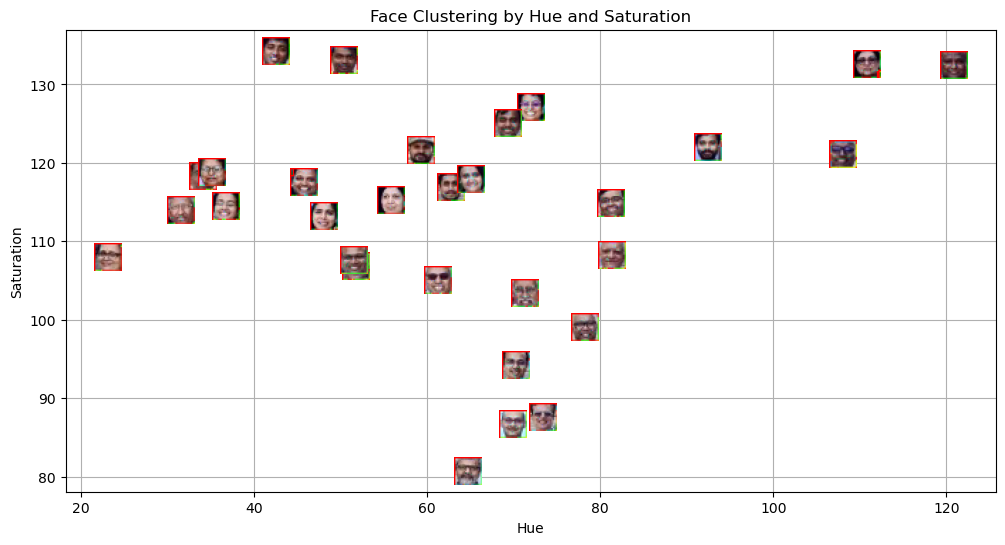

In [20]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
plt.xlabel('Hue') ## Provide x label
plt.ylabel('Saturation') ## Provide y label
plt.title('Face Clustering by Hue and Saturation') ## Provide title
plt.grid()
plt.show()
## Put x label
## Put y label
## Put title
## Put grid
## show the plot

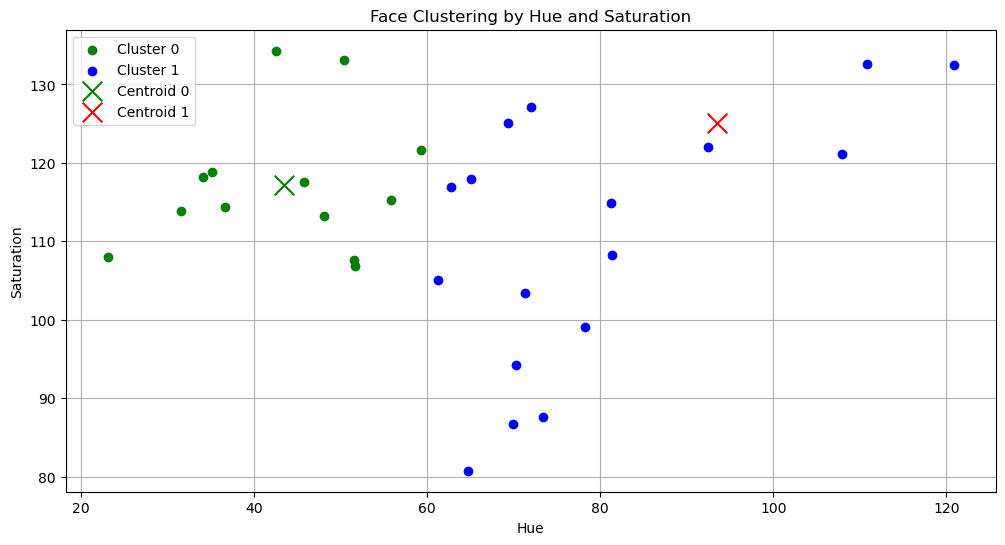

In [26]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='x', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='red', marker='x', s=200, label='Centroid 1')


## Put x label
plt.xlabel('Hue') ## Provide x label
## Put y label
plt.ylabel('Saturation') ## Provide y label
## Put title
plt.title('Face Clustering by Hue and Saturation') ## Provide title
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.show()


In [38]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg') ## image and store
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY), 1.1, 4)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Template Image with Detected Face", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

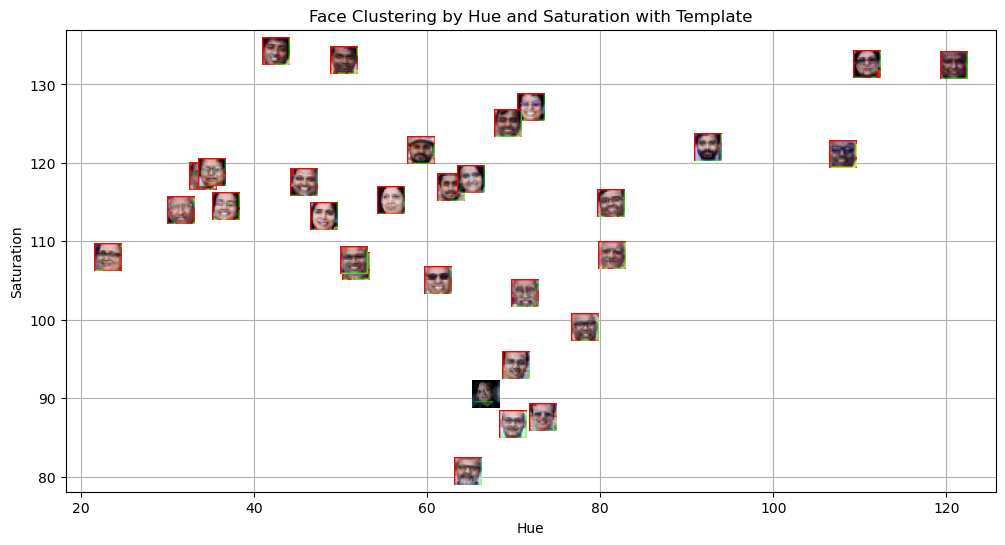

In [32]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in template_hsv

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = cv2.mean(template_hsv[:, :, 0])[0] ## extract hue feature and store in template_hue
template_saturation = cv2.mean(template_hsv[:, :, 1])[0] ## extract saturation feature and store in template_saturation

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0] ## predict the cluster label for the template image and store it in template_label

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)



## Put x label
plt.xlabel('Hue') ## Provide x label
## Put y label
plt.ylabel('Saturation') ## Provide y label
## Put title
plt.title('Face Clustering by Hue and Saturation with Template') ## Provide title
## Add grid
plt.grid()
## show plot
plt.show()

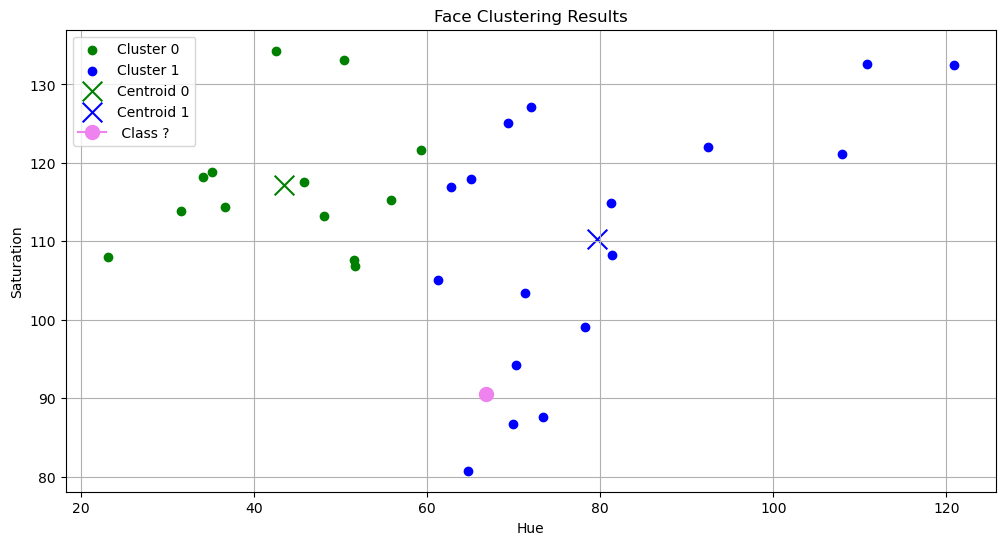

In [36]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], marker='x', c='green', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='x', c='blue', s=200, label='Centroid 1')
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )


## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering Results")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## show the plot
plt.show()
        ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
When I need to figure out how "close" two things are, I usually look at them in a few ways. The first is just a straight line, like if I used a ruler to connect two dots on a piece of paper. Another way is like walking through a city where I have to follow the streets, so I can only move up, down, left, or right. There is also a version where I only look at the single biggest difference between two points, ignoring the smaller ones.
#### 2. What are some real-world applications of distance-based classification algorithms? 
I see this working behind the scenes in a lot of places. For example, when a streaming service suggests a new show, it is looking for other users whose tastes are "close" to mine. It also happens when a bank flags a credit card purchase as fraud because the location or the amount is too "far" away from what I normally do. Even those apps that identify plants from a photo use this by comparing your picture to a library of known species to see which one it matches most closely.
#### 3. Explain various distance metrics. 
Euclidean Distance: I use this when I want the shortest path possible. It treats every direction equally. If I am measuring the distance between two stars in the sky, I use a straight line.

Manhattan Distance: I use this when the paths are restricted to an axis. If I am calculating how much wire I need to run along the walls of a room to get from one corner to another, I can't go through the air; I have to follow the edges.

Minkowski Distance: This is actually a master formula that can turn into either of the two above depending on a single setting. It is a flexible way to decide how much I want to "penalize" large gaps in the data.
#### 4. What is the role of cross validation in model performance? 
When I build a model, I want to make sure it actually works on data it hasn't seen before. I don't want it to just "memorize" the answers.
Cross-validation is like a student taking multiple practice exams. Instead of using the whole textbook to study and then taking the final, I hide one chapter, study the rest, and then test myself on that hidden chapter. I repeat this until I’ve tested myself on every chapter. This gives me a very honest view of how well I actually understand the material versus just recognizing the pictures.
#### 5. Explain variance and bias in terms of KNN? 
In an algorithm like KNN, I have to decide how many neighbors to listen to. If I listen to too many neighbors, I get "high bias." This means I am being too general and might miss the specific details of the point I am looking at. If I only listen to one neighbor, I get "high variance." This makes me too sensitive to tiny changes, and my answer might flip-flop just because one neighbor happens to be an oddball.